# DMI Weather Data (only the data 👨‍💻)

Scrapes DMI weather forcasts from [https://dmi.dk/](https://dmi.dk/)

Load modules, selenium is used for rendering and requires a WebDriver.
Download [http://chromedriver.chromium.org/](chromedriver) or [https://github.com/mozilla/geckodriver/releases](geckodriver)


In [1]:
import os
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from time import sleep
import datetime
from selenium.webdriver.chrome.options import Options
import seaborn as sea
import matplotlib.pyplot as plt
from IPython.display import display, HTML

options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
sea.set_palette(sea.cubehelix_palette(8, start=.5, rot=-.75))

Load web page and use Beautiful soup to parse. Stores vales in pandas dataframe.

In [2]:
url = 'https://www.dmi.dk/lokation/show/DK/2618425/K%C3%B8benhavn/'
driver = webdriver.Chrome(options=options, \
        executable_path="C:\\Users\\rpe\\AppData\\Local\\Chromedriver\\chromedriver.exe")
driver.get(url)
sleep(4)
data = driver.page_source
soup = bs(data, 'html.parser')
driver.close()

In [3]:
item = soup.findAll("div", {"class": "eWWhzX"})
weather = []
rain = ''
import re
wdate = datetime.datetime.now()
lasthour = wdate.hour
for i in item:
    line = i.get_text()
    stime = line[0:5]
    hour = int(stime[:2])
    time = datetime.datetime.strptime(stime, '%H:%M')
    if hour < lasthour:
        wdate += datetime.timedelta(days=1)
    lasthour = hour
#    print(line[5:])
    temp = int(re.search('(\d{1,3})°',line[5:]).group(1))
    match = re.search('°(.*)mm',line[5:])
    if match is not None:
        rain = match.group(1)
    wind = int(re.search('[m°](\d{1,2})\sm\/s',line[5:]).group(1))
    windgust = int(re.search('Vindstød\s(\d{1,2})\sm\/s',line[5:]).group(1))
    
    weather.append([datetime.datetime.combine(wdate, time.time()), temp,rain,wind,windgust])
df = pd.DataFrame.from_records(weather, columns=['Timestamp', 'Temperature', 'Rain', 'Wind', 'WindGust'])
df.head(10)

,Timestamp,Temperature,Rain,Wind,WindGust
0,2019-02-22 23:00:00,1,,3,7
1,2019-02-23 00:00:00,1,,3,4
2,2019-02-23 01:00:00,1,,3,5
3,2019-02-23 02:00:00,1,,3,5
4,2019-02-23 03:00:00,1,,3,5
5,2019-02-23 04:00:00,1,,3,5
6,2019-02-23 05:00:00,1,,2,6
7,2019-02-23 06:00:00,1,,2,5
8,2019-02-23 07:00:00,1,,3,4
9,2019-02-23 08:00:00,1,,3,4


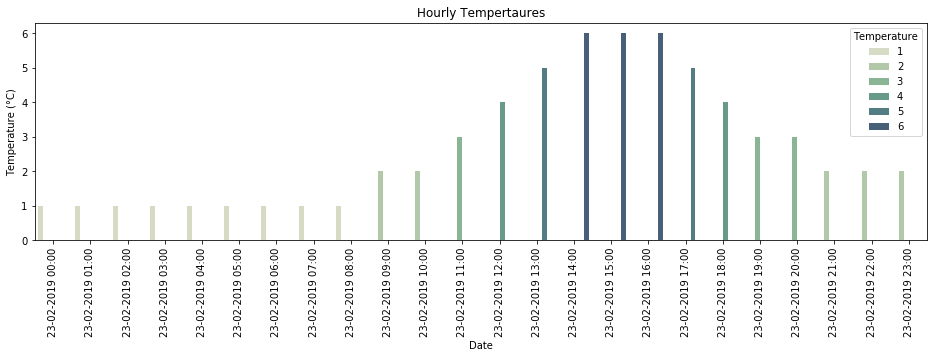

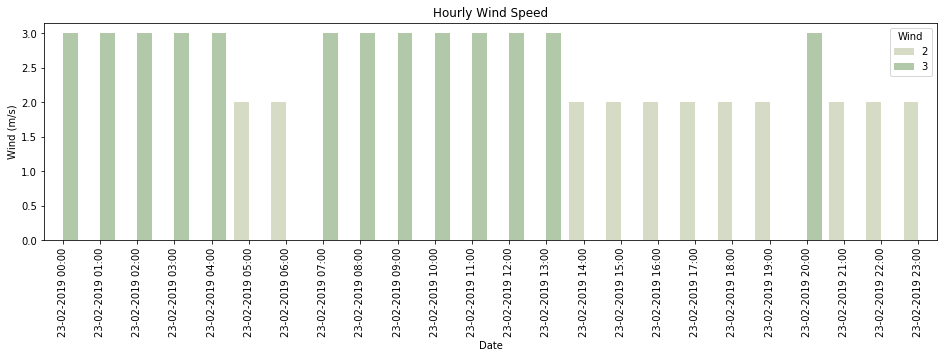

In [4]:
df['Date'] = df.apply(lambda x: datetime.datetime.strftime(x['Timestamp'],'%d-%m-%Y %H:%M'), axis=1)
plt.rcParams["figure.figsize"] =(16,4)
ax = sea.barplot(y="Temperature", hue="Temperature", x="Date", data=df.loc[1:24 ,])
ax.set_ylabel('Temperature (°C)')
#ax.set_xlabel('Time')
ax.set_title("Hourly Tempertaures") 
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()
ax = sea.barplot(y="Wind", x="Date",hue="Wind", data=df.loc[1:24 ,])
ax.set_ylabel('Wind (m/s)')
#ax.set_xlabel('Time')
ax.set_title("Hourly Wind Speed") 
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

Expolre the data

In [ ]:
display(HTML(df.to_html()))
print("Number of lines: {}".format(df.shape[0]))


Summarize data

In [7]:
df1 = df
df1['Date'] = df1.apply(lambda x: datetime.datetime.strftime(x['Timestamp'],'%d-%m-%Y'), axis=1)
df.groupby('Date')['Temperature'].min()

df1.agg({'Temperature' : [np.min, np.max]})

,Temperature
amin,1
amax,11
